# LAB 2

In [3]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

In [4]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("\\")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


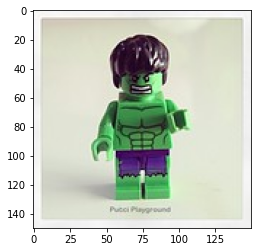

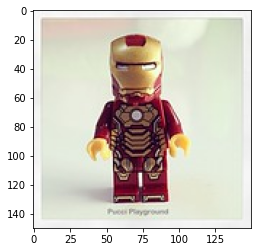

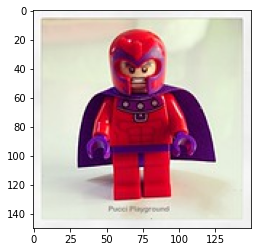

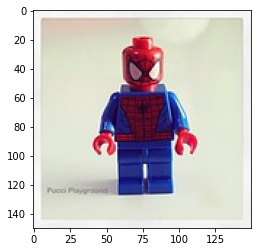

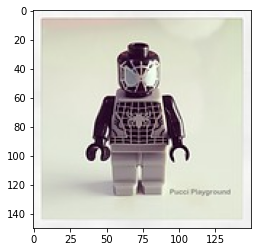

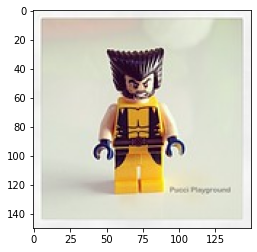

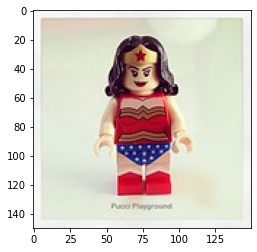

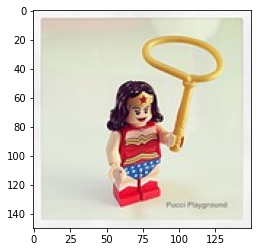

In [5]:
for k,v in images.items():
    plt.figure()
    plt.imshow(v)

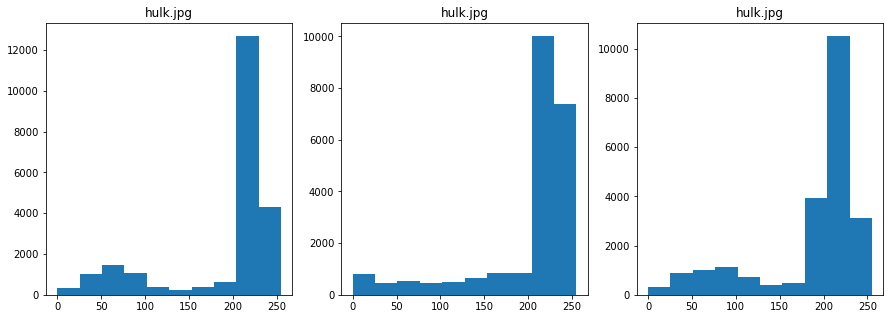

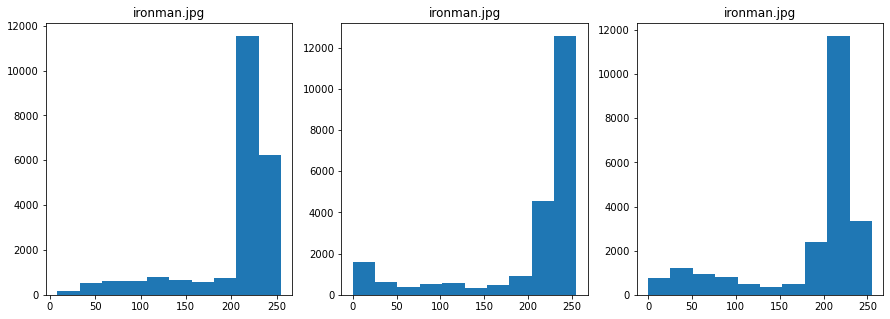

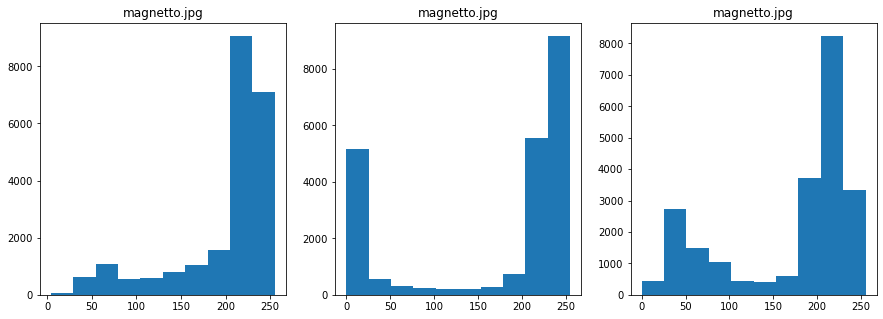

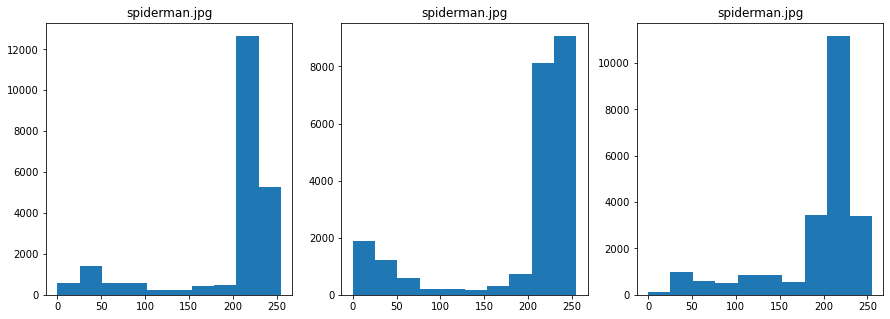

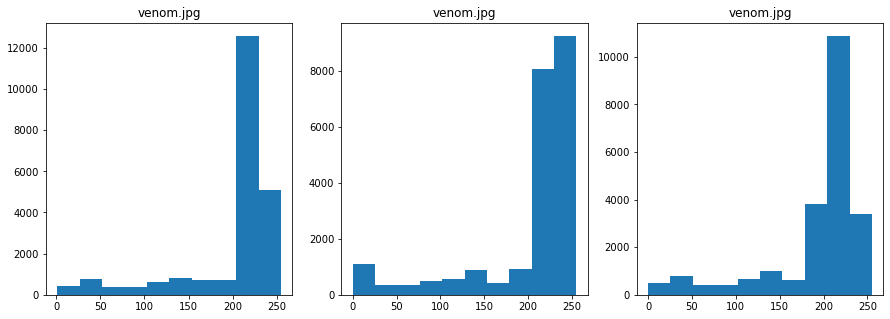

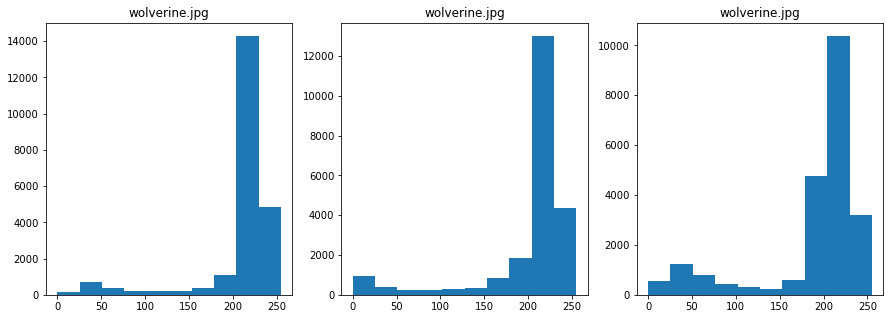

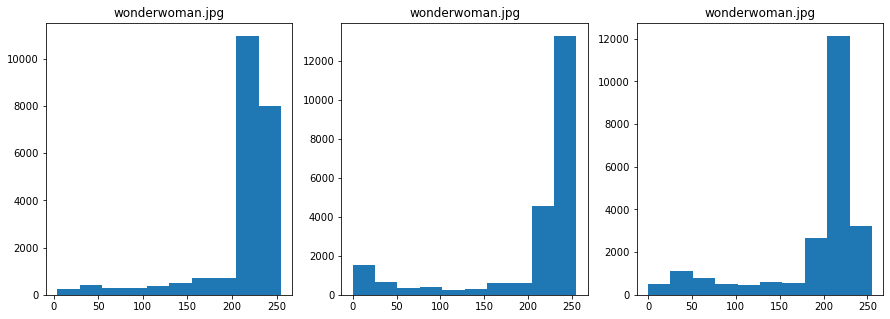

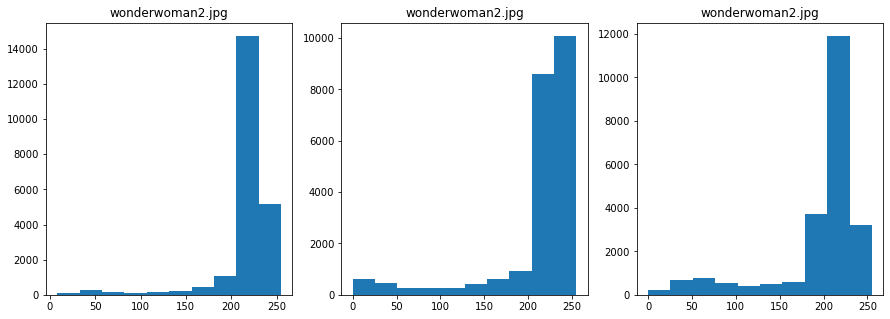

In [6]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x000001CACC7673A0>
Taxi <function cityblock at 0x000001CACC767820>


<ipython-input-7-3b01eae43995>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = figure.add_subplot(1,1,1)


Cheb <function chebyshev at 0x000001CACC767940>


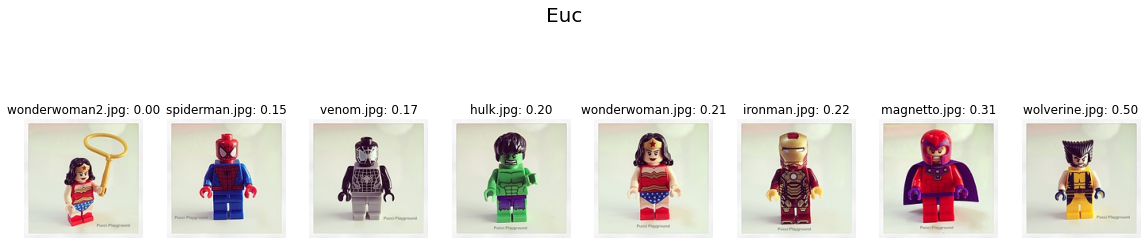

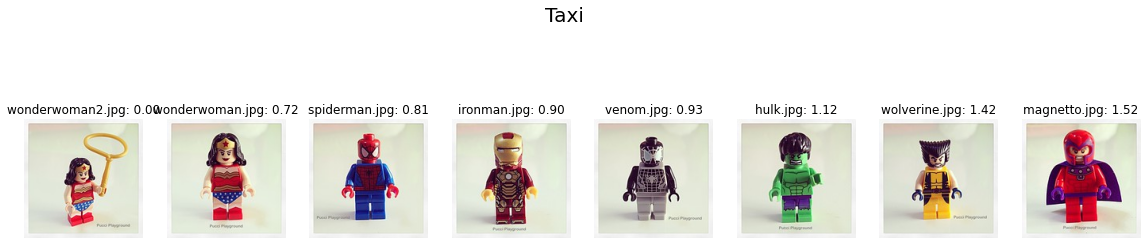

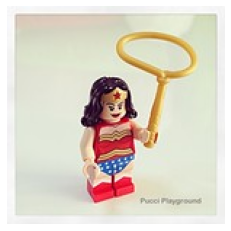

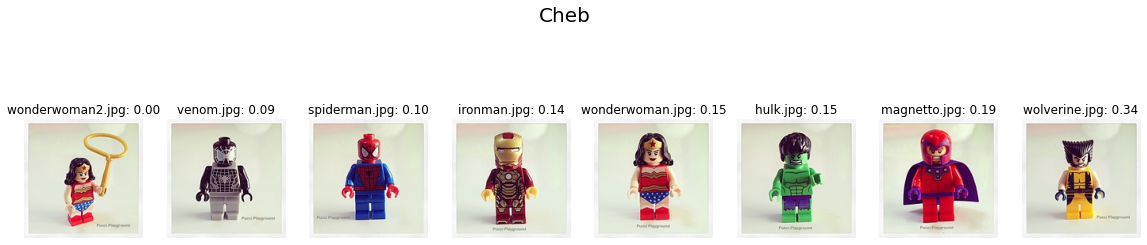

In [7]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman2.jpg"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman2.jpg"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

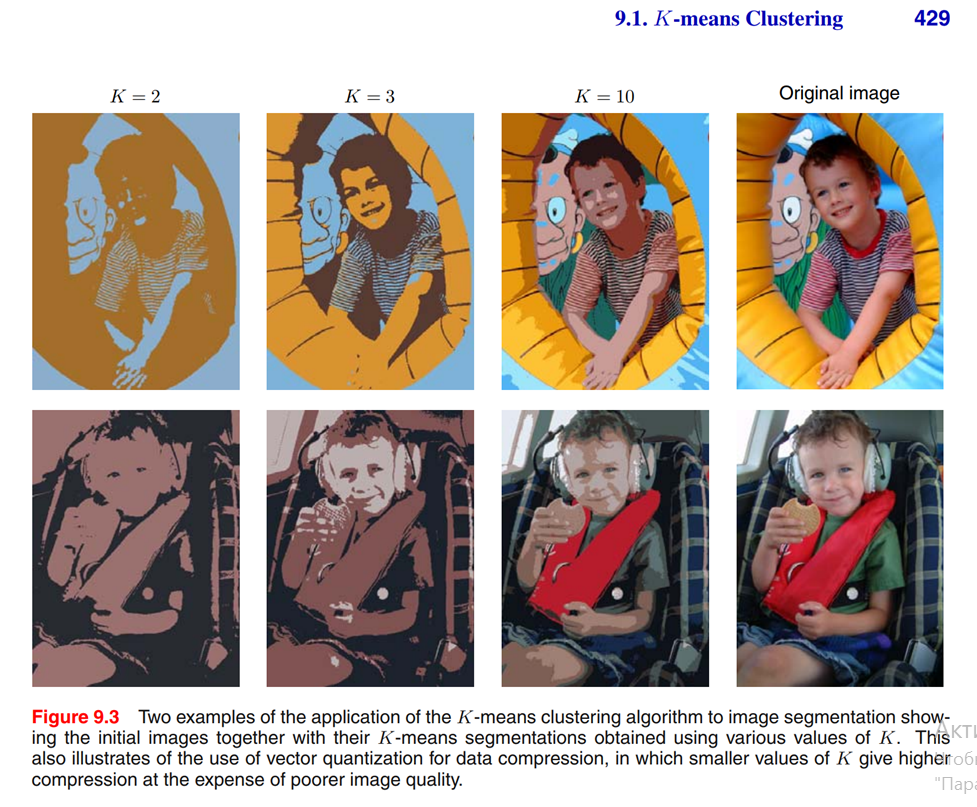

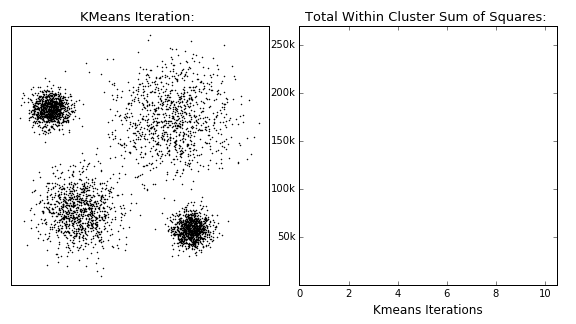

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [8]:
import numpy as np
class KMeans():
    def __init__(self, k):
        self.k = k # Amount of classes
    
    def fit(self, data):
        self.data = data
        self.centr = np.random.randint(0,256,size=(self.k,3))
        a = []
        bst_one = 1e+10
        while True:
            zeros = np.zeros((self.data.shape[0],self.k))
            sum_m = [np.linalg.norm(self.data-self.centr[i],axis = 1) for i in range(self.k)]
            minsum_m = np.argmin(sum_m,axis =0)
            for i in range(self.k):
                zeros[minsum_m==i,i]=1
                
            b = np.sum([np.sum(zeros[:,i]*np.linalg.norm(self.data-self.centr[i],axis = 1),axis = 0) for i in range(self.k)],axis = 0)
            
            if b>bst_one:
                break
            
            for i in range(self.centr.shape[0]):
                self.centr[i] = np.sum(zeros[:,i][:,np.newaxis]*self.data, axis = 0)/np.sum(zeros[:,i])
                a.append(b)
                bst_one = b
                
                
                
    def classify(self,x):
        mmean = np.argmin([np.linalg.norm(self.data - self.centr[i],axis = 1) for i in range(self.k)],axis = 0)
        l = np.zeros(x.shape)
        for j in range(self.centr.shape[0]):
            l[mmean == j,:] = self.centr[j]
        return l.astype(np.uint8)

In [9]:
# Input data
data = [images["ironman.jpg"].reshape((-1,3)) for k in images.keys()]
data[0].shape

(22500, 3)

In [10]:
res = []
for k in [2,3,10]:
    km = KMeans(k)
    km.fit(data[0])
    res.append(km.classify(data[0]))

<ipython-input-8-a0d4c27bcb5f>:24: RuntimeWarning: invalid value encountered in true_divide
  self.centr[i] = np.sum(zeros[:,i][:,np.newaxis]*self.data, axis = 0)/np.sum(zeros[:,i])


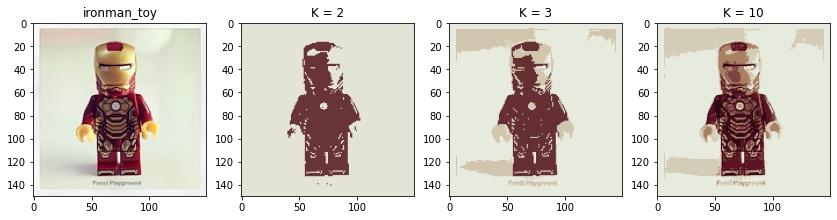

In [16]:
# Visualize the result image 
# Put your code here
plt.figure(figsize=(18, 12))
plt.subplot(1, 5, 1)
plt.title('ironman_toy')
plt.imshow(data[0].reshape(150, 150, 3))
for i, k in enumerate([2, 3, 10]):
    plt.subplot(1, 5, i+2)
    plt.title(f'K = {k}')
    plt.imshow(res[i].reshape(150, 150, 3))
    
plt.show()